In [2]:
###read the pdb files and compute distances
import os
from biopandas.pdb import PandasPdb
import pandas as pd
directory = r'../structures/'
binding_res = {}

for structure in os.listdir(directory):
    res = pd.DataFrame() #initialize a pandas dataframe to store the data
    if structure.endswith(".pdb") : #select pdb files in the directory
        print(structure)
        struct = structure.split('.')[0]
        x = PandasPdb().read_pdb(os.path.join(directory, structure)) #read the pdb file using biopanda and save as a dataframe
        lig_coord = x.df['HETATM'][['x_coord','y_coord','z_coord']] #extract hetatm coordinates, dataframe
        lig_coord_tup = list(lig_coord.itertuples(index=False, name=None)) #convert dataframe into tuple
        for i in lig_coord_tup : #iterate over tuple
            distances = x.distance(xyz=i, records=('ATOM',)) #extract distance from protein atoms w.r.t the coordinates of hetatm's
            all_within_3_5A = x.df['ATOM'][distances <= 3.5] #calculate the distance values within a cut off and save as a dataframe with atom information
            res = pd.concat([res,all_within_3_5A],axis=0) #append the results into a dataframe, so that lines are not overwritten
    else :
        continue
    unique_res = res['residue_number'].unique()
    
    for index in unique_res :
        binding_res[str(struct) + '_' + str(index)] = 1
    

for key in sorted(binding_res.keys()):
    print(key,binding_res[key])

Q8WZA1_cat.pdb
Q9LAK3.pdb
Q92410.pdb
Q10471.pdb
Q8NBL1.pdb
Q9VBZ9.pdb
Q9SWH5.pdb
P15291.pdb
Q91ZW2.pdb
O43173.pdb
O94766.pdb
Q9ES89.pdb
Q8WZA1_stem.pdb
Q9Y2G5.pdb
Q86Y38.pdb
Q09328.pdb
P15907.pdb
Q9LZJ3.pdb
Q02745.pdb
Q10469.pdb
Q8N4A0.pdb
P16442.pdb
Q9P2W7.pdb
Q3U4G3.pdb
Q09324.pdb
O15294.pdb
O15294_498 1
O15294_560 1
O15294_653 1
O15294_694 1
O15294_841 1
O15294_920 1
O15294_921 1
O43173_190 1
O43173_211 1
O43173_213 1
O43173_214 1
O43173_218 1
O43173_246 1
O43173_250 1
O43173_252 1
O43173_298 1
O43173_301 1
O94766_155 1
O94766_156 1
O94766_161 1
O94766_194 1
O94766_227 1
O94766_247 1
O94766_252 1
O94766_253 1
O94766_277 1
O94766_281 1
O94766_308 1
P15291_224 1
P15291_248 1
P15291_276 1
P15291_285 1
P15291_288 1
P15291_310 1
P15291_311 1
P15291_312 1
P15291_313 1
P15291_314 1
P15291_315 1
P15291_355 1
P15291_356 1
P15907_108 1
P15907_112 1
P15907_116 1
P15907_122 1
P15907_212 1
P15907_213 1
P15907_233 1
P15907_236 1
P15907_242 1
P15907_257 1
P15907_259 1
P15907_274 1
P15907_323 1
P15

In [2]:
##read and extract fasta file with a window size 9
from Bio import SeqIO

fragment = {}

for record in SeqIO.parse("../all_seq.fasta","fasta"):
    prot_seq = record.seq 
    #print(record.id)
    for j in range(len(prot_seq)-9) : 
        #print(prot_seq[j:j+8], str(j+4))
        fragment[str(record.id.split("|")[1]) + '_' + str(j+5)] = str(prot_seq[j:j+9])

print(fragment)

{'P16442_5': 'MAEVLRTLA', 'P16442_6': 'AEVLRTLAG', 'P16442_7': 'EVLRTLAGK', 'P16442_8': 'VLRTLAGKP', 'P16442_9': 'LRTLAGKPK', 'P16442_10': 'RTLAGKPKC', 'P16442_11': 'TLAGKPKCH', 'P16442_12': 'LAGKPKCHA', 'P16442_13': 'AGKPKCHAL', 'P16442_14': 'GKPKCHALR', 'P16442_15': 'KPKCHALRP', 'P16442_16': 'PKCHALRPM', 'P16442_17': 'KCHALRPMI', 'P16442_18': 'CHALRPMIL', 'P16442_19': 'HALRPMILF', 'P16442_20': 'ALRPMILFL', 'P16442_21': 'LRPMILFLI', 'P16442_22': 'RPMILFLIM', 'P16442_23': 'PMILFLIML', 'P16442_24': 'MILFLIMLV', 'P16442_25': 'ILFLIMLVL', 'P16442_26': 'LFLIMLVLV', 'P16442_27': 'FLIMLVLVL', 'P16442_28': 'LIMLVLVLF', 'P16442_29': 'IMLVLVLFG', 'P16442_30': 'MLVLVLFGY', 'P16442_31': 'LVLVLFGYG', 'P16442_32': 'VLVLFGYGV', 'P16442_33': 'LVLFGYGVL', 'P16442_34': 'VLFGYGVLS', 'P16442_35': 'LFGYGVLSP', 'P16442_36': 'FGYGVLSPR', 'P16442_37': 'GYGVLSPRS', 'P16442_38': 'YGVLSPRSL', 'P16442_39': 'GVLSPRSLM', 'P16442_40': 'VLSPRSLMP', 'P16442_41': 'LSPRSLMPG', 'P16442_42': 'SPRSLMPGS', 'P16442_43': 'PR

In [3]:
#create positive & negative dataset
#positive = {}
#negative = {}

for key in sorted(fragment.keys()) :
    if key in binding_res:
        binding_res[key] = binding_res[key]
    else:
        binding_res[key] = 0

In [4]:
binding_res
f= open("../9_35/data_positive_negative.txt","w+") 
for keys in sorted(binding_res.keys()):
    f.write(str(keys) + ' ' + str(binding_res[keys]) + "\n") #write and save the positive and negative dataset as a dictionary

In [5]:
print(binding_res['P16442_185'])
print(binding_res['P16442_186'])

1
0


In [6]:
for keys in sorted(fragment.keys()): # representation of the fragment dataset in a different way
    print('>' + str(keys))
    print(fragment[keys])

>O15294_10
KRMLSFQGL
>O15294_100
QEAIEHYRH
>O15294_1000
LFNTKQYTM
>O15294_1001
FNTKQYTME
>O15294_1002
NTKQYTMEL
>O15294_1003
TKQYTMELE
>O15294_1004
KQYTMELER
>O15294_1005
QYTMELERL
>O15294_1006
YTMELERLY
>O15294_1007
TMELERLYL
>O15294_1008
MELERLYLQ
>O15294_1009
ELERLYLQM
>O15294_101
EAIEHYRHA
>O15294_1010
LERLYLQMW
>O15294_1011
ERLYLQMWE
>O15294_1012
RLYLQMWEH
>O15294_1013
LYLQMWEHY
>O15294_1014
YLQMWEHYA
>O15294_1015
LQMWEHYAA
>O15294_1016
QMWEHYAAG
>O15294_1017
MWEHYAAGN
>O15294_1018
WEHYAAGNK
>O15294_1019
EHYAAGNKP
>O15294_102
AIEHYRHAL
>O15294_1020
HYAAGNKPD
>O15294_1021
YAAGNKPDH
>O15294_1022
AAGNKPDHM
>O15294_1023
AGNKPDHMI
>O15294_1024
GNKPDHMIK
>O15294_1025
NKPDHMIKP
>O15294_1026
KPDHMIKPV
>O15294_1027
PDHMIKPVE
>O15294_1028
DHMIKPVEV
>O15294_1029
HMIKPVEVT
>O15294_103
IEHYRHALR
>O15294_1030
MIKPVEVTE
>O15294_1031
IKPVEVTES
>O15294_104
EHYRHALRL
>O15294_105
HYRHALRLK
>O15294_106
YRHALRLKP
>O15294_107
RHALRLKPD
>O15294_108
HALRLKPDF
>O15294_109
ALRLKPDFI
>O15294_11
RMLSFQGLA
>O

>O94766_101
SQTLSLVPR
>O94766_102
QTLSLVPRL
>O94766_103
TLSLVPRLH
>O94766_104
LSLVPRLHW
>O94766_105
SLVPRLHWL
>O94766_106
LVPRLHWLL
>O94766_107
VPRLHWLLV
>O94766_108
PRLHWLLVE
>O94766_109
RLHWLLVED
>O94766_11
NVFLAYFLV
>O94766_110
LHWLLVEDA
>O94766_111
HWLLVEDAE
>O94766_112
WLLVEDAEG
>O94766_113
LLVEDAEGP
>O94766_114
LVEDAEGPT
>O94766_115
VEDAEGPTP
>O94766_116
EDAEGPTPL
>O94766_117
DAEGPTPLV
>O94766_118
AEGPTPLVS
>O94766_119
EGPTPLVSG
>O94766_12
VFLAYFLVS
>O94766_120
GPTPLVSGL
>O94766_121
PTPLVSGLL
>O94766_122
TPLVSGLLA
>O94766_123
PLVSGLLAA
>O94766_124
LVSGLLAAS
>O94766_125
VSGLLAASG
>O94766_126
SGLLAASGL
>O94766_127
GLLAASGLL
>O94766_128
LLAASGLLF
>O94766_129
LAASGLLFT
>O94766_13
FLAYFLVSI
>O94766_130
AASGLLFTH
>O94766_131
ASGLLFTHL
>O94766_132
SGLLFTHLV
>O94766_133
GLLFTHLVV
>O94766_134
LLFTHLVVL
>O94766_135
LFTHLVVLT
>O94766_136
FTHLVVLTP
>O94766_137
THLVVLTPK
>O94766_138
HLVVLTPKA
>O94766_139
LVVLTPKAQ
>O94766_14
LAYFLVSIA
>O94766_140
VVLTPKAQR
>O94766_141
VLTPKAQRL
>O94766_142
LT

>Q02745_140
EKRLVSCRR
>Q02745_141
KRLVSCRRC
>Q02745_142
RLVSCRRCA
>Q02745_143
LVSCRRCAV
>Q02745_144
VSCRRCAVV
>Q02745_145
SCRRCAVVG
>Q02745_146
CRRCAVVGN
>Q02745_147
RRCAVVGNS
>Q02745_148
RCAVVGNSG
>Q02745_149
CAVVGNSGN
>Q02745_15
KLLTLLVLF
>Q02745_150
AVVGNSGNL
>Q02745_151
VVGNSGNLK
>Q02745_152
VGNSGNLKE
>Q02745_153
GNSGNLKES
>Q02745_154
NSGNLKESY
>Q02745_155
SGNLKESYY
>Q02745_156
GNLKESYYG
>Q02745_157
NLKESYYGP
>Q02745_158
LKESYYGPQ
>Q02745_159
KESYYGPQI
>Q02745_16
LLTLLVLFI
>Q02745_160
ESYYGPQID
>Q02745_161
SYYGPQIDS
>Q02745_162
YYGPQIDSH
>Q02745_163
YGPQIDSHD
>Q02745_164
GPQIDSHDF
>Q02745_165
PQIDSHDFV
>Q02745_166
QIDSHDFVL
>Q02745_167
IDSHDFVLR
>Q02745_168
DSHDFVLRM
>Q02745_169
SHDFVLRMN
>Q02745_17
LTLLVLFIF
>Q02745_170
HDFVLRMNK
>Q02745_171
DFVLRMNKA
>Q02745_172
FVLRMNKAP
>Q02745_173
VLRMNKAPT
>Q02745_174
LRMNKAPTE
>Q02745_175
RMNKAPTEG
>Q02745_176
MNKAPTEGF
>Q02745_177
NKAPTEGFE
>Q02745_178
KAPTEGFEA
>Q02745_179
APTEGFEAD
>Q02745_18
TLLVLFIFL
>Q02745_180
PTEGFEADV
>Q02745_181
TE

VIFSHDFWS
>Q10469_154
IFSHDFWST
>Q10469_155
FSHDFWSTE
>Q10469_156
SHDFWSTEI
>Q10469_157
HDFWSTEIN
>Q10469_158
DFWSTEINQ
>Q10469_159
FWSTEINQL
>Q10469_16
ILTLVVAAC
>Q10469_160
WSTEINQLI
>Q10469_161
STEINQLIA
>Q10469_162
TEINQLIAG
>Q10469_163
EINQLIAGV
>Q10469_164
INQLIAGVN
>Q10469_165
NQLIAGVNF
>Q10469_166
QLIAGVNFC
>Q10469_167
LIAGVNFCP
>Q10469_168
IAGVNFCPV
>Q10469_169
AGVNFCPVL
>Q10469_17
LTLVVAACG
>Q10469_170
GVNFCPVLQ
>Q10469_171
VNFCPVLQV
>Q10469_172
NFCPVLQVF
>Q10469_173
FCPVLQVFF
>Q10469_174
CPVLQVFFP
>Q10469_175
PVLQVFFPF
>Q10469_176
VLQVFFPFS
>Q10469_177
LQVFFPFSI
>Q10469_178
QVFFPFSIQ
>Q10469_179
VFFPFSIQL
>Q10469_18
TLVVAACGF
>Q10469_180
FFPFSIQLY
>Q10469_181
FPFSIQLYP
>Q10469_182
PFSIQLYPN
>Q10469_183
FSIQLYPNE
>Q10469_184
SIQLYPNEF
>Q10469_185
IQLYPNEFP
>Q10469_186
QLYPNEFPG
>Q10469_187
LYPNEFPGS
>Q10469_188
YPNEFPGSD
>Q10469_189
PNEFPGSDP
>Q10469_19
LVVAACGFV
>Q10469_190
NEFPGSDPR
>Q10469_191
EFPGSDPRD
>Q10469_192
FPGSDPRDC
>Q10469_193
PGSDPRDCP
>Q10469_194
GSDPRDCPR
>Q10

IPEGIAVDG
>Q86Y38_488
PEGIAVDGG
>Q86Y38_489
EGIAVDGGS
>Q86Y38_49
RRGGAAVGG
>Q86Y38_490
GIAVDGGSD
>Q86Y38_491
IAVDGGSDW
>Q86Y38_492
AVDGGSDWF
>Q86Y38_493
VDGGSDWFL
>Q86Y38_494
DGGSDWFLL
>Q86Y38_495
GGSDWFLLN
>Q86Y38_496
GSDWFLLNR
>Q86Y38_497
SDWFLLNRR
>Q86Y38_498
DWFLLNRRF
>Q86Y38_499
WFLLNRRFV
>Q86Y38_5
MVAAPCARR
>Q86Y38_50
RGGAAVGGG
>Q86Y38_500
FLLNRRFVE
>Q86Y38_501
LLNRRFVEY
>Q86Y38_502
LNRRFVEYV
>Q86Y38_503
NRRFVEYVT
>Q86Y38_504
RRFVEYVTF
>Q86Y38_505
RFVEYVTFS
>Q86Y38_506
FVEYVTFST
>Q86Y38_507
VEYVTFSTD
>Q86Y38_508
EYVTFSTDD
>Q86Y38_509
YVTFSTDDL
>Q86Y38_51
GGAAVGGGE
>Q86Y38_510
VTFSTDDLV
>Q86Y38_511
TFSTDDLVT
>Q86Y38_512
FSTDDLVTK
>Q86Y38_513
STDDLVTKM
>Q86Y38_514
TDDLVTKMK
>Q86Y38_515
DDLVTKMKQ
>Q86Y38_516
DLVTKMKQF
>Q86Y38_517
LVTKMKQFY
>Q86Y38_518
VTKMKQFYS
>Q86Y38_519
TKMKQFYSY
>Q86Y38_52
GAAVGGGEQ
>Q86Y38_520
KMKQFYSYT
>Q86Y38_521
MKQFYSYTL
>Q86Y38_522
KQFYSYTLL
>Q86Y38_523
QFYSYTLLP
>Q86Y38_524
FYSYTLLPA
>Q86Y38_525
YSYTLLPAE
>Q86Y38_526
SYTLLPAES
>Q86Y38_527
YTLLPAESF
>Q86Y3

>Q8WZA1_121
TTVLEDEAR
>Q8WZA1_122
TVLEDEARE
>Q8WZA1_123
VLEDEAREQ
>Q8WZA1_124
LEDEAREQG
>Q8WZA1_125
EDEAREQGR
>Q8WZA1_126
DEAREQGRG
>Q8WZA1_127
EAREQGRGI
>Q8WZA1_128
AREQGRGIH
>Q8WZA1_129
REQGRGIHV
>Q8WZA1_13
LIKPFGARK
>Q8WZA1_130
EQGRGIHVI
>Q8WZA1_131
QGRGIHVIV
>Q8WZA1_132
GRGIHVIVL
>Q8WZA1_133
RGIHVIVLN
>Q8WZA1_134
GIHVIVLNQ
>Q8WZA1_135
IHVIVLNQA
>Q8WZA1_136
HVIVLNQAT
>Q8WZA1_137
VIVLNQATG
>Q8WZA1_138
IVLNQATGH
>Q8WZA1_139
VLNQATGHV
>Q8WZA1_14
IKPFGARKK
>Q8WZA1_140
LNQATGHVM
>Q8WZA1_141
NQATGHVMA
>Q8WZA1_142
QATGHVMAK
>Q8WZA1_143
ATGHVMAKR
>Q8WZA1_144
TGHVMAKRV
>Q8WZA1_145
GHVMAKRVF
>Q8WZA1_146
HVMAKRVFD
>Q8WZA1_147
VMAKRVFDT
>Q8WZA1_148
MAKRVFDTY
>Q8WZA1_149
AKRVFDTYS
>Q8WZA1_15
KPFGARKKR
>Q8WZA1_150
KRVFDTYSP
>Q8WZA1_151
RVFDTYSPH
>Q8WZA1_152
VFDTYSPHE
>Q8WZA1_153
FDTYSPHED
>Q8WZA1_154
DTYSPHEDE
>Q8WZA1_155
TYSPHEDEA
>Q8WZA1_156
YSPHEDEAM
>Q8WZA1_157
SPHEDEAMV
>Q8WZA1_158
PHEDEAMVL
>Q8WZA1_159
HEDEAMVLF
>Q8WZA1_16
PFGARKKRS
>Q8WZA1_160
EDEAMVLFL
>Q8WZA1_161
DEAMVLFLN
>Q8WZA1_162
EA

>Q9ES89_53
MLTLRREIK
>Q9ES89_54
LTLRREIKS
>Q9ES89_55
TLRREIKSP
>Q9ES89_56
LRREIKSPS
>Q9ES89_57
RREIKSPSK
>Q9ES89_58
REIKSPSKS
>Q9ES89_59
EIKSPSKSA
>Q9ES89_6
MRGCHICKL
>Q9ES89_60
IKSPSKSAL
>Q9ES89_61
KSPSKSALD
>Q9ES89_62
SPSKSALDS
>Q9ES89_63
PSKSALDSF
>Q9ES89_64
SKSALDSFT
>Q9ES89_65
KSALDSFTL
>Q9ES89_66
SALDSFTLI
>Q9ES89_67
ALDSFTLIM
>Q9ES89_68
LDSFTLIMQ
>Q9ES89_69
DSFTLIMQT
>Q9ES89_7
RGCHICKLP
>Q9ES89_70
SFTLIMQTY
>Q9ES89_71
FTLIMQTYN
>Q9ES89_72
TLIMQTYNR
>Q9ES89_73
LIMQTYNRT
>Q9ES89_74
IMQTYNRTD
>Q9ES89_75
MQTYNRTDL
>Q9ES89_76
QTYNRTDLL
>Q9ES89_77
TYNRTDLLL
>Q9ES89_78
YNRTDLLLR
>Q9ES89_79
NRTDLLLRL
>Q9ES89_8
GCHICKLPG
>Q9ES89_80
RTDLLLRLL
>Q9ES89_81
TDLLLRLLN
>Q9ES89_82
DLLLRLLNH
>Q9ES89_83
LLLRLLNHY
>Q9ES89_84
LLRLLNHYQ
>Q9ES89_85
LRLLNHYQA
>Q9ES89_86
RLLNHYQAV
>Q9ES89_87
LLNHYQAVP
>Q9ES89_88
LNHYQAVPS
>Q9ES89_89
NHYQAVPSL
>Q9ES89_9
CHICKLPGR
>Q9ES89_90
HYQAVPSLH
>Q9ES89_91
YQAVPSLHK
>Q9ES89_92
QAVPSLHKV
>Q9ES89_93
AVPSLHKVI
>Q9ES89_94
VPSLHKVIV
>Q9ES89_95
PSLHKVIVV
>Q9ES89_96
SLHKVI

HYDNFVGGI
>Q9VBZ9_183
YDNFVGGIL
>Q9VBZ9_184
DNFVGGILL
>Q9VBZ9_185
NFVGGILLV
>Q9VBZ9_186
FVGGILLVR
>Q9VBZ9_187
VGGILLVRR
>Q9VBZ9_188
GGILLVRRE
>Q9VBZ9_189
GILLVRREH
>Q9VBZ9_19
LSFCLGGIA
>Q9VBZ9_190
ILLVRREHF
>Q9VBZ9_191
LLVRREHFK
>Q9VBZ9_192
LVRREHFKQ
>Q9VBZ9_193
VRREHFKQM
>Q9VBZ9_194
RREHFKQMN
>Q9VBZ9_195
REHFKQMNG
>Q9VBZ9_196
EHFKQMNGM
>Q9VBZ9_197
HFKQMNGMS
>Q9VBZ9_198
FKQMNGMSN
>Q9VBZ9_199
KQMNGMSNQ
>Q9VBZ9_20
SFCLGGIAV
>Q9VBZ9_200
QMNGMSNQY
>Q9VBZ9_201
MNGMSNQYW
>Q9VBZ9_202
NGMSNQYWG
>Q9VBZ9_203
GMSNQYWGW
>Q9VBZ9_204
MSNQYWGWG
>Q9VBZ9_205
SNQYWGWGL
>Q9VBZ9_206
NQYWGWGLE
>Q9VBZ9_207
QYWGWGLED
>Q9VBZ9_208
YWGWGLEDD
>Q9VBZ9_209
WGWGLEDDE
>Q9VBZ9_21
FCLGGIAVL
>Q9VBZ9_210
GWGLEDDEF
>Q9VBZ9_211
WGLEDDEFF
>Q9VBZ9_212
GLEDDEFFV
>Q9VBZ9_213
LEDDEFFVR
>Q9VBZ9_214
EDDEFFVRI
>Q9VBZ9_215
DDEFFVRIR
>Q9VBZ9_216
DEFFVRIRD
>Q9VBZ9_217
EFFVRIRDA
>Q9VBZ9_218
FFVRIRDAG
>Q9VBZ9_219
FVRIRDAGL
>Q9VBZ9_22
CLGGIAVLS
>Q9VBZ9_220
VRIRDAGLQ
>Q9VBZ9_221
RIRDAGLQV
>Q9VBZ9_222
IRDAGLQVT
>Q9VBZ9_223
RDAGLQVTR
>Q9V

In [7]:
f= open("../9_35/data.txt","w+")
for keys in sorted(fragment.keys()):
    f.write('>' + str(keys) + "\n")
    f.write(fragment[keys] + "\n") #save the fragment dataset in a different way

In [10]:
#segregate the data as train and test (80/20)
import numpy as np
seq = pd.read_csv('../seq_id.txt', header = None)
print(seq)
#print(seq[0])
np.random.seed(25)
train, test = np.split(seq.sample(frac=1), [int(.8*len(seq))])
print(train)
print(test)

         0
0   P16442
1   P15291
2   Q9VBZ9
3   Q3U4G3
4   Q8WZA1
5   Q09324
6   Q86Y38
7   Q10469
8   Q09328
9   Q92410
10  Q10471
11  Q8N4A0
12  Q02745
13  P15907
14  O43173
15  Q9LZJ3
16  Q9SWH5
17  O15294
18  Q9LAK3
19  Q9P2W7
20  O94766
21  Q9ES89
22  Q91ZW2
23  Q9Y2G5
24  Q8NBL1
         0
2   Q9VBZ9
9   Q92410
17  O15294
10  Q10471
21  Q9ES89
13  P15907
0   P16442
6   Q86Y38
16  Q9SWH5
11  Q8N4A0
20  O94766
14  O43173
23  Q9Y2G5
19  Q9P2W7
3   Q3U4G3
7   Q10469
1   P15291
5   Q09324
24  Q8NBL1
8   Q09328
         0
18  Q9LAK3
12  Q02745
22  Q91ZW2
15  Q9LZJ3
4   Q8WZA1


In [11]:
#extracting pssm based features

import math
all_frag = []

for a in train[0] :
    file_name = str(a) #read the uniprot ids in training set
    #print(a)
    pssm = pd.read_csv('../pssm/' + file_name + '_pssm.csv', index_col = 0) # read each pssm files
    #print(pssm)
    pssm_array = np.array(pssm)
    n, m =pssm_array.shape #(n = rows, m = columns)
    #print(n, m)
    for i in range (n-9) :  #run the loop till (seq length - window length) i = row
        x = pssm_array[i:i+9]       #slice upto window length = 9
        #print(x)              #print the sub array
        x_mod = np.delete(x, 0, 1) #delete the first/0 th column
        y = np.asmatrix(x_mod) #convert the modified 2d array into a matrix 
        #print(y.flatten())  # flatten the matrix
        z = y.flatten().tolist() #flatten the matrix and convert to list
        z_mod = []
        #print(z)
        frag_feat =[]
        for j in z :
            for k in j:
                frag_feat.append(1 / (1 + math.exp(-k))) #use sigmoidal function
                
        frag_feat.append(a + '_' + str(i+5)) # add the last column with information about uniprot id
        #print(frag_feat)
        all_frag.append(frag_feat) #= pd.concat([all_frag, frag_feat],axis=0)

In [12]:
all_frag = pd.DataFrame(all_frag) #save the pssm as a dataframe
all_frag.head(2)

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,0.119203,0.017986,0.500000,0.731059,0.500000,0.999877,0.268941,0.119203,0.017986,0.119203,...,0.047426,0.997527,0.017986,0.047426,0.731059,0.017986,0.047426,0.006693,0.017986,Q9VBZ9_5
1,0.731059,0.268941,0.731059,0.500000,0.880797,0.731059,0.500000,0.047426,0.119203,0.119203,...,0.268941,0.268941,0.017986,0.017986,0.017986,0.017986,0.017986,0.006693,0.017986,Q9VBZ9_6


In [13]:
all_frag.shape

(9688, 181)

In [14]:
#b assign column name
all_frag.rename(columns={180:'id'}, inplace=True) #change the column name to id
all_frag.head(15)

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,id
0,0.119203,0.017986,0.500000,0.731059,0.500000,0.999877,0.268941,0.119203,0.017986,0.119203,...,0.047426,0.997527,0.017986,0.047426,0.731059,0.017986,0.047426,0.006693,0.017986,Q9VBZ9_5
1,0.731059,0.268941,0.731059,0.500000,0.880797,0.731059,0.500000,0.047426,0.119203,0.119203,...,0.268941,0.268941,0.017986,0.017986,0.017986,0.017986,0.017986,0.006693,0.017986,Q9VBZ9_6
2,0.268941,0.268941,0.268941,0.047426,0.268941,0.119203,0.047426,0.017986,0.500000,0.047426,...,0.500000,0.731059,0.017986,0.017986,0.047426,0.017986,0.119203,0.006693,0.017986,Q9VBZ9_7
3,0.119203,0.006693,0.993307,0.880797,0.880797,0.731059,0.268941,0.047426,0.017986,0.880797,...,0.500000,0.119203,0.047426,0.268941,0.731059,0.119203,0.047426,0.047426,0.047426,Q9VBZ9_8
4,0.500000,0.500000,0.119203,0.047426,0.047426,0.119203,0.119203,0.999089,0.119203,0.119203,...,0.047426,0.017986,0.017986,0.047426,0.047426,0.006693,0.006693,0.006693,0.006693,Q9VBZ9_9
5,0.268941,0.268941,0.119203,0.047426,0.500000,0.119203,0.047426,0.017986,0.119203,0.047426,...,0.119203,0.268941,0.047426,0.017986,0.017986,0.017986,0.017986,0.017986,0.017986,Q9VBZ9_10
6,0.119203,0.017986,0.982014,0.500000,0.731059,0.731059,0.993307,0.119203,0.017986,0.047426,...,0.119203,0.268941,0.017986,0.047426,0.017986,0.017986,0.017986,0.006693,0.017986,Q9VBZ9_11
7,0.119203,0.047426,0.017986,0.017986,0.017986,0.268941,0.017986,0.017986,0.047426,0.017986,...,0.952574,0.119203,0.119203,0.119203,0.047426,0.119203,0.119203,0.119203,0.119203,Q9VBZ9_12
8,0.047426,0.017986,0.047426,0.268941,0.119203,0.119203,0.952574,0.999665,0.006693,0.993307,...,0.880797,0.500000,0.047426,0.047426,0.047426,0.047426,0.047426,0.017986,0.047426,Q9VBZ9_13
9,0.119203,0.006693,0.952574,0.952574,0.952574,0.500000,0.880797,0.047426,0.017986,0.119203,...,0.731059,0.268941,0.017986,0.047426,0.047426,0.047426,0.047426,0.017986,0.017986,Q9VBZ9_14


In [15]:
len(all_frag['id'].unique()) # unique rows

9688

In [16]:
dataframe1 = pd.read_csv("../9_35/data_positive_negative.txt", header=None, delim_whitespace=True)
print(dataframe1)

                 0  1
0        O15294_10  0
1       O15294_100  0
2      O15294_1000  0
3      O15294_1001  0
4      O15294_1002  0
...            ... ..
11802    Q9Y2G5_95  0
11803    Q9Y2G5_96  0
11804    Q9Y2G5_97  0
11805    Q9Y2G5_98  0
11806    Q9Y2G5_99  0

[11807 rows x 2 columns]


In [17]:
dataframe1.rename(columns={0:'id',1:'class'}, inplace=True)
dataframe1.head(2)

,id,class
0,O15294_10,0
1,O15294_100,0


In [18]:
# join the 2 dataframes by the id coplumn (pssm and positive negative values)

result = pd.merge(all_frag, dataframe1, on='id') 
#print(result)
print('')
print(result.head(2))
print(result.shape)


          0         1         2         3         4         5         6  \
0  0.119203  0.017986  0.500000  0.731059  0.500000  0.999877  0.268941   
1  0.731059  0.268941  0.731059  0.500000  0.880797  0.731059  0.500000   

          7         8         9  ...       172       173       174       175  \
0  0.119203  0.017986  0.119203  ...  0.997527  0.017986  0.047426  0.731059   
1  0.047426  0.119203  0.119203  ...  0.268941  0.017986  0.017986  0.017986   

        176       177       178       179        id  class  
0  0.017986  0.047426  0.006693  0.017986  Q9VBZ9_5      0  
1  0.017986  0.017986  0.006693  0.017986  Q9VBZ9_6      0  

[2 rows x 182 columns]
(9688, 182)


In [19]:
result[['uniprot_id', 'res']] = result.id.str.split("_",expand=True)
print(result.head(2))

          0         1         2         3         4         5         6  \
0  0.119203  0.017986  0.500000  0.731059  0.500000  0.999877  0.268941   
1  0.731059  0.268941  0.731059  0.500000  0.880797  0.731059  0.500000   

          7         8         9  ...       174       175       176       177  \
0  0.119203  0.017986  0.119203  ...  0.047426  0.731059  0.017986  0.047426   
1  0.047426  0.119203  0.119203  ...  0.017986  0.017986  0.017986  0.017986   

        178       179        id  class  uniprot_id  res  
0  0.006693  0.017986  Q9VBZ9_5      0      Q9VBZ9    5  
1  0.006693  0.017986  Q9VBZ9_6      0      Q9VBZ9    6  

[2 rows x 184 columns]


In [20]:
len(result['uniprot_id'].unique())

20

In [21]:
result['uniprot_id'].unique()

array(['Q9VBZ9', 'Q92410', 'O15294', 'Q10471', 'Q9ES89', 'P15907',
       'P16442', 'Q86Y38', 'Q9SWH5', 'Q8N4A0', 'O94766', 'O43173',
       'Q9Y2G5', 'Q9P2W7', 'Q3U4G3', 'Q10469', 'P15291', 'Q09324',
       'Q8NBL1', 'Q09328'], dtype=object)

In [22]:
result.to_csv('../9_35/pssm_feature_train_final_35.csv')

In [23]:
result.shape

(9688, 184)

Counter({0: 9471, 1: 217})


<BarContainer object of 2 artists>

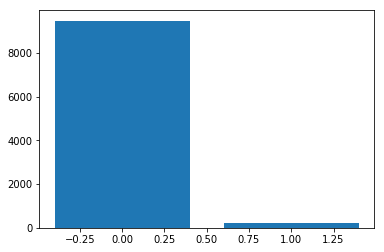

In [25]:
#frequency 
import matplotlib.pyplot as plt
from collections import Counter
class_freq = Counter(result['class'])
print(class_freq)
plt.bar(class_freq.keys(), class_freq.values())

In [26]:
result[['uniprot_id', 'res']] = result.id.str.split("_",expand=True)
result.to_csv('../9_35/pssm_feature_train_final.csv')
result

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,id,class,uniprot_id,res
0,0.119203,0.017986,0.500000,0.731059,0.500000,0.999877,0.268941,0.119203,0.017986,0.119203,...,0.047426,0.731059,0.017986,0.047426,0.006693,0.017986,Q9VBZ9_5,0,Q9VBZ9,5
1,0.731059,0.268941,0.731059,0.500000,0.880797,0.731059,0.500000,0.047426,0.119203,0.119203,...,0.017986,0.017986,0.017986,0.017986,0.006693,0.017986,Q9VBZ9_6,0,Q9VBZ9,6
2,0.268941,0.268941,0.268941,0.047426,0.268941,0.119203,0.047426,0.017986,0.500000,0.047426,...,0.017986,0.047426,0.017986,0.119203,0.006693,0.017986,Q9VBZ9_7,0,Q9VBZ9,7
3,0.119203,0.006693,0.993307,0.880797,0.880797,0.731059,0.268941,0.047426,0.017986,0.880797,...,0.268941,0.731059,0.119203,0.047426,0.047426,0.047426,Q9VBZ9_8,0,Q9VBZ9,8
4,0.500000,0.500000,0.119203,0.047426,0.047426,0.119203,0.119203,0.999089,0.119203,0.119203,...,0.047426,0.047426,0.006693,0.006693,0.006693,0.006693,Q9VBZ9_9,0,Q9VBZ9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,0.119203,0.119203,0.017986,0.017986,0.017986,0.017986,0.017986,0.006693,0.119203,0.017986,...,0.119203,0.047426,0.047426,0.047426,0.017986,0.047426,Q09328_732,0,Q09328,732
9684,0.119203,0.017986,0.268941,0.268941,0.268941,0.268941,0.982014,0.880797,0.017986,0.047426,...,0.047426,0.017986,0.017986,0.017986,0.017986,0.017986,Q09328_733,0,Q09328,733
9685,0.268941,0.047426,0.952574,0.880797,0.731059,0.997527,0.500000,0.119203,0.047426,0.119203,...,0.880797,0.500000,0.982014,0.880797,0.268941,0.731059,Q09328_734,0,Q09328,734
9686,0.268941,0.119203,0.047426,0.047426,0.047426,0.119203,0.017986,0.047426,0.268941,0.017986,...,0.268941,0.268941,0.268941,0.119203,0.993307,0.731059,Q09328_735,0,Q09328,735


In [27]:
x_train = result.drop(['id', 'class', 'uniprot_id', 'res'], 1)

#print(x_train)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

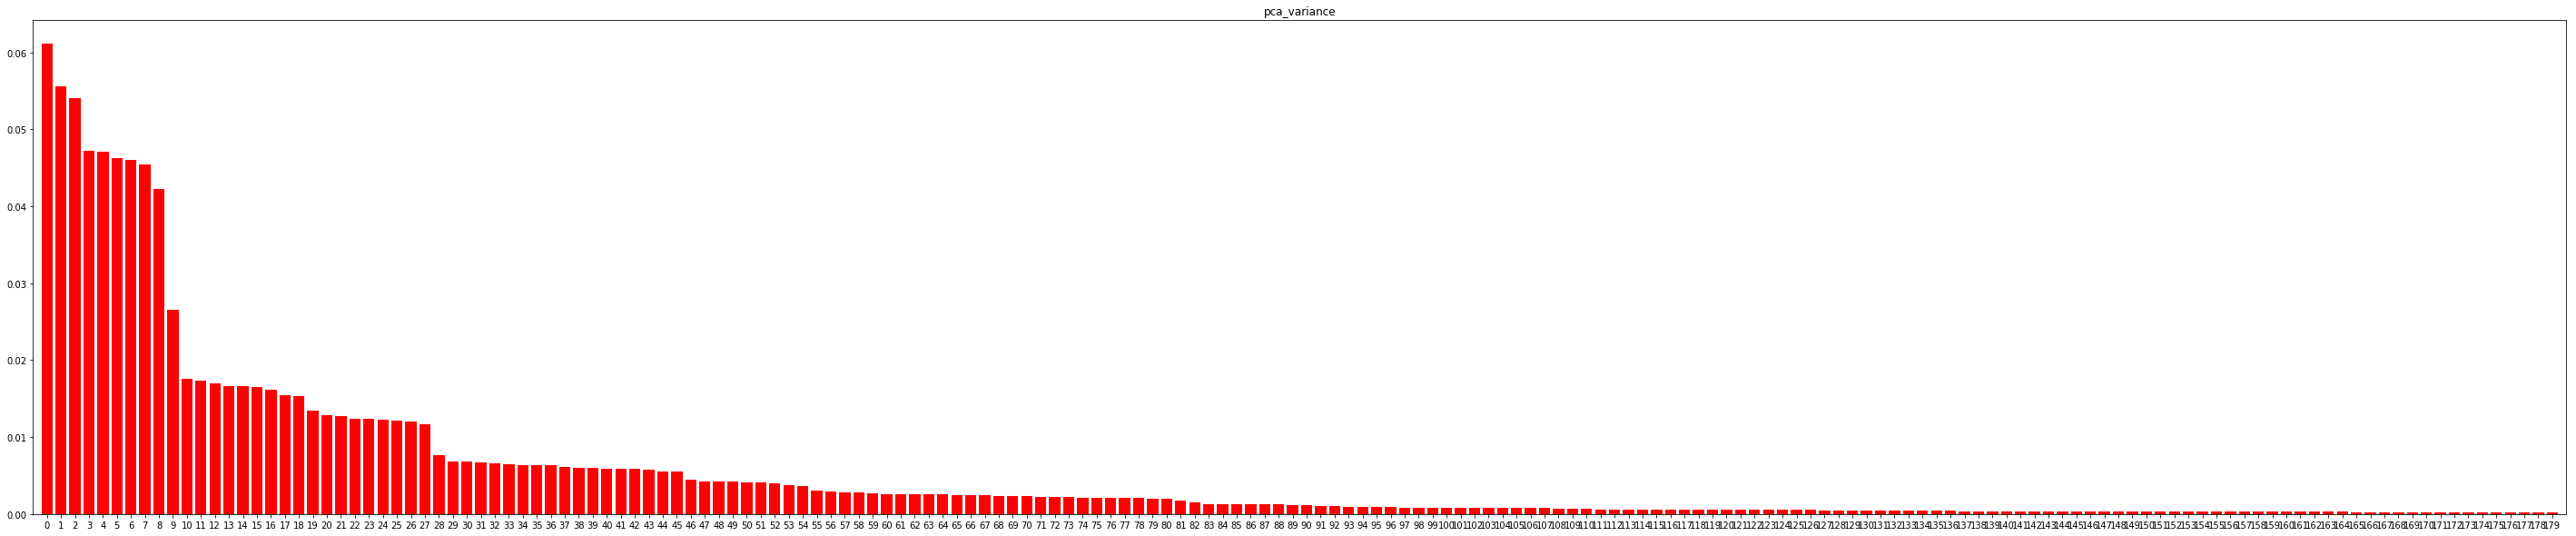

In [28]:
import matplotlib.pyplot as plt
pca_var = pca.explained_variance_ratio_
indices = np.argsort(pca_var)[::-1]
plt.figure(figsize=(50,10))
plt.title('pca_variance')
plt.bar(range(x_train_pca.shape[1]),pca_var[indices], color ='r', align = 'center')
plt.xticks(range(x_train_pca.shape[1]), indices)
plt.xlim([-1, x_train_pca.shape[1]])
plt.show()

/home/ansuman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,id,class,uniprot_id,res,train_index
0,0.119203,0.017986,0.500000,0.731059,0.500000,0.999877,0.268941,0.119203,0.017986,0.119203,...,0.731059,0.017986,0.047426,0.006693,0.017986,Q9VBZ9_5,0,Q9VBZ9,5,35
1,0.731059,0.268941,0.731059,0.500000,0.880797,0.731059,0.500000,0.047426,0.119203,0.119203,...,0.017986,0.017986,0.017986,0.006693,0.017986,Q9VBZ9_6,0,Q9VBZ9,6,19
2,0.268941,0.268941,0.268941,0.047426,0.268941,0.119203,0.047426,0.017986,0.500000,0.047426,...,0.047426,0.017986,0.119203,0.006693,0.017986,Q9VBZ9_7,0,Q9VBZ9,7,40
3,0.119203,0.006693,0.993307,0.880797,0.880797,0.731059,0.268941,0.047426,0.017986,0.880797,...,0.731059,0.119203,0.047426,0.047426,0.047426,Q9VBZ9_8,0,Q9VBZ9,8,2
4,0.500000,0.500000,0.119203,0.047426,0.047426,0.119203,0.119203,0.999089,0.119203,0.119203,...,0.047426,0.006693,0.006693,0.006693,0.006693,Q9VBZ9_9,0,Q9VBZ9,9,40
5,0.268941,0.268941,0.119203,0.047426,0.500000,0.119203,0.047426,0.017986,0.119203,0.047426,...,0.017986,0.017986,0.017986,0.017986,0.017986,Q9VBZ9_10,0,Q9VBZ9,10,14
6,0.119203,0.017986,0.982014,0.500000,0.731059,0.731059,0.993307,0.119203,0.017986,0.047426,...,0.017986,0.017986,0.017986,0.006693,0.017986,Q9VBZ9_11,0,Q9VBZ9,11,17
7,0.119203,0.047426,0.017986,0.017986,0.017986,0.268941,0.017986,0.017986,0.047426,0.017986,...,0.047426,0.119203,0.119203,0.119203,0.119203,Q9VBZ9_12,0,Q9VBZ9,12,4
8,0.047426,0.017986,0.047426,0.268941,0.119203,0.119203,0.952574,0.999665,0.006693,0.993307,...,0.047426,0.047426,0.047426,0.017986,0.047426,Q9VBZ9_13,0,Q9VBZ9,13,26
9,0.119203,0.006693,0.952574,0.952574,0.952574,0.500000,0.880797,0.047426,0.017986,0.119203,...,0.047426,0.047426,0.047426,0.017986,0.017986,Q9VBZ9_14,0,Q9VBZ9,14,25


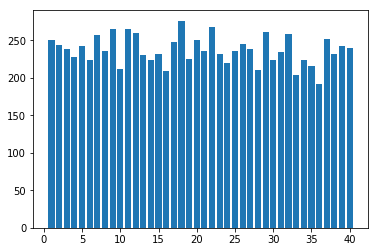

In [29]:
##split the training data
result_train_positive = result[result['class'] == 1]
result_train_negative = result[result['class'] == 0]


#segregate the negative training data into 40 parts


#for negative in range(40) :
#    first_split + str(negative) = result_train_positive.sample(frac=0.025,random_state=200)
#    print(first_split + str(negative))
#    first_split_remove + str(negative+1) = result_train_positive.drop((first_split + str(negative)).index)
#    second_split = (first_split_remove + + str(negative+1)).sample(frac=0.025,random_state=200)
#    print(second_split)

import random

mylist = []
random.seed(30)

for number in range(0, 9471):
    #np.random.seed(30)
    
    x = random.randint(1,40)
    mylist.append(x)

#distribution of random number

random_number = pd.DataFrame(mylist,columns=['train_index'])

random_freq = Counter(random_number['train_index'])
#print(random_freq)
plt.bar(random_freq.keys(), random_freq.values())

# join the 2 dataframes by the id coplumn (pssm and positive negative values)

result_train_negative['train_index'] = mylist 

result_train_negative.head(10)

In [30]:
#making test set
#extracting pssm based features

import math
all_frag1 = []

for a1 in test[0] :
    file_name1 = str(a1) #read the uniprot ids in test set
    #print(a)
    pssm1 = pd.read_csv('../pssm/' + file_name + '_pssm.csv', index_col = 0) # read each pssm files
    #print(pssm)
    pssm_array1 = np.array(pssm1)
    n1, m1 =pssm_array1.shape #(n = rows, m = columns)
    #print(n, m)
    for i1 in range (n1-9) :  #run the loop till (seq length - window length) i = row
        x1 = pssm_array1[i1:i1+9]       #slice upto window length = 9
        #print(x)              #print the sub array
        x1_mod = np.delete(x1, 0, 1) #delete the first/0 th column
        y1 = np.asmatrix(x1_mod) #convert the modified 2d array into a matrix 
        #print(y.flatten())  # flatten the matrix
        z1 = y1.flatten().tolist() #flatten the matrix and convert to list
        z1_mod = []
        #print(z)
        frag_feat1 =[]
        for j1 in z1 :
            for k1 in j1:
                frag_feat1.append(1 / (1 + math.exp(-k1))) #use sigmoidal function
                
        frag_feat1.append(a1 + '_' + str(i1+5)) # add the last column with information about uniprot id
        #print(frag_feat)
        all_frag1.append(frag_feat1) #= pd.concat([all_frag, frag_feat],axis=0)

In [31]:
all_frag1 = pd.DataFrame(all_frag1) #save the pssm as a dataframe
all_frag1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,0.268941,0.047426,0.731059,0.880797,0.500000,0.999089,0.500000,0.119203,0.047426,0.119203,...,0.268941,0.268941,0.017986,0.119203,0.047426,0.047426,0.119203,0.017986,0.047426,Q9LAK3_5
1,0.982014,0.952574,0.119203,0.119203,0.268941,0.268941,0.047426,0.047426,0.268941,0.268941,...,0.731059,0.119203,0.500000,0.500000,0.268941,0.500000,0.268941,0.500000,0.500000,Q9LAK3_6


In [32]:
all_frag1.shape

(3660, 181)

In [33]:
#b assign column name
all_frag1.rename(columns={180:'id'}, inplace=True) #change the column name to id
all_frag1.head(15)

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,id
0,0.268941,0.047426,0.731059,0.880797,0.500000,0.999089,0.500000,0.119203,0.047426,0.119203,...,0.268941,0.268941,0.017986,0.119203,0.047426,0.047426,0.119203,0.017986,0.047426,Q9LAK3_5
1,0.982014,0.952574,0.119203,0.119203,0.268941,0.268941,0.047426,0.047426,0.268941,0.268941,...,0.731059,0.119203,0.500000,0.500000,0.268941,0.500000,0.268941,0.500000,0.500000,Q9LAK3_6
2,0.500000,0.119203,0.500000,0.731059,0.500000,0.500000,0.880797,0.119203,0.268941,0.268941,...,0.731059,0.119203,0.500000,0.500000,0.268941,0.500000,0.268941,0.500000,0.500000,Q9LAK3_7
3,0.268941,0.047426,0.500000,0.500000,0.731059,0.500000,0.993307,0.268941,0.982014,0.119203,...,0.268941,0.119203,0.500000,0.997527,0.500000,0.731059,0.731059,0.268941,0.880797,Q9LAK3_8
4,0.268941,0.119203,0.268941,0.268941,0.268941,0.268941,0.982014,0.500000,0.119203,0.119203,...,0.268941,0.119203,0.500000,0.731059,0.268941,0.993307,0.880797,0.268941,0.731059,Q9LAK3_9
5,0.268941,0.047426,0.500000,0.952574,0.500000,0.731059,0.268941,0.047426,0.997527,0.119203,...,0.268941,0.268941,0.017986,0.119203,0.047426,0.047426,0.119203,0.017986,0.047426,Q9LAK3_10
6,0.047426,0.047426,0.047426,0.119203,0.047426,0.119203,0.731059,0.999994,0.017986,0.500000,...,0.119203,0.047426,0.268941,0.119203,0.119203,0.119203,0.047426,0.119203,0.119203,Q9LAK3_11
7,0.268941,0.119203,0.047426,0.047426,0.047426,0.119203,0.017986,0.047426,0.268941,0.047426,...,0.119203,0.952574,0.047426,0.017986,0.119203,0.047426,0.047426,0.017986,0.017986,Q9LAK3_12
8,0.119203,0.017986,0.731059,0.982014,0.731059,0.880797,0.500000,0.119203,0.047426,0.119203,...,0.119203,0.952574,0.047426,0.017986,0.119203,0.017986,0.047426,0.017986,0.017986,Q9LAK3_13
9,0.731059,0.268941,0.047426,0.047426,0.119203,0.119203,0.047426,0.047426,0.268941,0.268941,...,0.268941,0.268941,0.017986,0.119203,0.047426,0.047426,0.119203,0.017986,0.047426,Q9LAK3_14


In [34]:
len(all_frag1['id'].unique()) # unique rows

3660

In [35]:
# join the 2 dataframes by the id coplumn (pssm and positive negative values)

result1 = pd.merge(all_frag1, dataframe1, on='id') 
#print(result)
print('')
print(result1.head( 2))
print(result1.shape)


          0         1         2         3         4         5         6  \
0  0.268941  0.047426  0.731059  0.880797  0.500000  0.999089  0.500000   
1  0.982014  0.952574  0.119203  0.119203  0.268941  0.268941  0.047426   

          7         8         9  ...       172       173       174       175  \
0  0.119203  0.047426  0.119203  ...  0.268941  0.017986  0.119203  0.047426   
1  0.047426  0.268941  0.268941  ...  0.119203  0.500000  0.500000  0.268941   

        176       177       178       179        id  class  
0  0.047426  0.119203  0.017986  0.047426  Q9LAK3_5      0  
1  0.500000  0.268941  0.500000  0.500000  Q9LAK3_6      0  

[2 rows x 182 columns]
(2102, 182)


In [36]:
result1[['uniprot_id', 'res']] = result1.id.str.split("_",expand=True)

In [37]:
len(result1['uniprot_id'].unique())

5

In [38]:
result1['uniprot_id'].unique()

array(['Q9LAK3', 'Q02745', 'Q91ZW2', 'Q9LZJ3', 'Q8WZA1'], dtype=object)

In [39]:
result1.to_csv('../9_35/pssm_feature_test_final_35.csv')

Counter({0: 2029, 1: 73})


<BarContainer object of 2 artists>

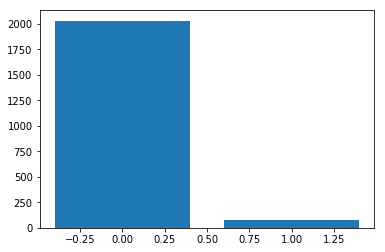

In [40]:
#frequency 
class_freq1 = Counter(result1['class'])
print(class_freq1)
plt.bar(class_freq1.keys(), class_freq1.values())

In [41]:
result1[['uniprot_id', 'res']] = result1.id.str.split("_",expand=True)
result1.to_csv('../9_35/pssm_feature_test_final.csv')
result1

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,id,class,uniprot_id,res
0,0.268941,0.047426,0.731059,0.880797,0.500000,0.999089,0.500000,0.119203,0.047426,0.119203,...,0.119203,0.047426,0.047426,0.119203,0.017986,0.047426,Q9LAK3_5,0,Q9LAK3,5
1,0.982014,0.952574,0.119203,0.119203,0.268941,0.268941,0.047426,0.047426,0.268941,0.268941,...,0.500000,0.268941,0.500000,0.268941,0.500000,0.500000,Q9LAK3_6,0,Q9LAK3,6
2,0.500000,0.119203,0.500000,0.731059,0.500000,0.500000,0.880797,0.119203,0.268941,0.268941,...,0.500000,0.268941,0.500000,0.268941,0.500000,0.500000,Q9LAK3_7,1,Q9LAK3,7
3,0.268941,0.047426,0.500000,0.500000,0.731059,0.500000,0.993307,0.268941,0.982014,0.119203,...,0.997527,0.500000,0.731059,0.731059,0.268941,0.880797,Q9LAK3_8,0,Q9LAK3,8
4,0.268941,0.119203,0.268941,0.268941,0.268941,0.268941,0.982014,0.500000,0.119203,0.119203,...,0.731059,0.268941,0.993307,0.880797,0.268941,0.731059,Q9LAK3_9,0,Q9LAK3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,0.268941,0.119203,0.047426,0.047426,0.119203,0.268941,0.047426,0.047426,0.119203,0.731059,...,0.880797,0.500000,0.731059,0.500000,0.731059,0.997527,Q8WZA1_651,0,Q8WZA1,651
2098,0.731059,0.268941,0.047426,0.047426,0.119203,0.119203,0.047426,0.047426,0.268941,0.268941,...,0.731059,0.500000,0.731059,0.500000,0.731059,0.982014,Q8WZA1_652,0,Q8WZA1,652
2099,0.268941,0.047426,0.119203,0.119203,0.268941,0.119203,0.047426,0.047426,0.047426,0.999955,...,0.997527,0.731059,0.880797,0.731059,0.268941,0.880797,Q8WZA1_653,0,Q8WZA1,653
2100,0.268941,0.119203,0.047426,0.047426,0.047426,0.119203,0.017986,0.047426,0.268941,0.047426,...,0.119203,0.047426,0.047426,0.119203,0.017986,0.047426,Q8WZA1_654,0,Q8WZA1,654


In [42]:
result_test_positive = result[result['class'] == 1]

In [43]:
result_train_negative

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,id,class,uniprot_id,res,train_index
0,0.119203,0.017986,0.500000,0.731059,0.500000,0.999877,0.268941,0.119203,0.017986,0.119203,...,0.731059,0.017986,0.047426,0.006693,0.017986,Q9VBZ9_5,0,Q9VBZ9,5,35
1,0.731059,0.268941,0.731059,0.500000,0.880797,0.731059,0.500000,0.047426,0.119203,0.119203,...,0.017986,0.017986,0.017986,0.006693,0.017986,Q9VBZ9_6,0,Q9VBZ9,6,19
2,0.268941,0.268941,0.268941,0.047426,0.268941,0.119203,0.047426,0.017986,0.500000,0.047426,...,0.047426,0.017986,0.119203,0.006693,0.017986,Q9VBZ9_7,0,Q9VBZ9,7,40
3,0.119203,0.006693,0.993307,0.880797,0.880797,0.731059,0.268941,0.047426,0.017986,0.880797,...,0.731059,0.119203,0.047426,0.047426,0.047426,Q9VBZ9_8,0,Q9VBZ9,8,2
4,0.500000,0.500000,0.119203,0.047426,0.047426,0.119203,0.119203,0.999089,0.119203,0.119203,...,0.047426,0.006693,0.006693,0.006693,0.006693,Q9VBZ9_9,0,Q9VBZ9,9,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,0.119203,0.119203,0.017986,0.017986,0.017986,0.017986,0.017986,0.006693,0.119203,0.017986,...,0.047426,0.047426,0.047426,0.017986,0.047426,Q09328_732,0,Q09328,732,1
9684,0.119203,0.017986,0.268941,0.268941,0.268941,0.268941,0.982014,0.880797,0.017986,0.047426,...,0.017986,0.017986,0.017986,0.017986,0.017986,Q09328_733,0,Q09328,733,1
9685,0.268941,0.047426,0.952574,0.880797,0.731059,0.997527,0.500000,0.119203,0.047426,0.119203,...,0.500000,0.982014,0.880797,0.268941,0.731059,Q09328_734,0,Q09328,734,17
9686,0.268941,0.119203,0.047426,0.047426,0.047426,0.119203,0.017986,0.047426,0.268941,0.017986,...,0.268941,0.268941,0.119203,0.993307,0.731059,Q09328_735,0,Q09328,735,13


In [44]:
result_train_positive

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,id,class,uniprot_id,res
118,0.047426,0.017986,0.119203,0.268941,0.119203,0.268941,0.997527,0.500000,0.017986,0.047426,...,0.017986,0.006693,0.017986,0.017986,0.017986,0.006693,Q9VBZ9_123,1,Q9VBZ9,123
140,0.119203,0.006693,0.997527,0.731059,0.880797,0.731059,0.268941,0.017986,0.017986,0.119203,...,0.047426,0.017986,0.017986,0.047426,0.006693,0.017986,Q9VBZ9_145,1,Q9VBZ9,145
172,0.119203,0.017986,0.731059,0.993307,0.500000,0.731059,0.731059,0.119203,0.017986,0.119203,...,0.268941,0.119203,0.500000,0.119203,0.268941,0.119203,Q9VBZ9_177,1,Q9VBZ9,177
174,0.119203,0.017986,0.017986,0.017986,0.017986,0.017986,0.006693,0.006693,0.999665,0.017986,...,0.047426,0.017986,0.047426,0.017986,0.017986,0.017986,Q9VBZ9_179,1,Q9VBZ9,179
177,0.047426,0.017986,0.006693,0.017986,0.006693,0.047426,0.047426,0.017986,0.017986,0.006693,...,0.017986,0.006693,0.017986,0.017986,0.017986,0.006693,Q9VBZ9_182,1,Q9VBZ9,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,0.731059,0.982014,0.047426,0.047426,0.119203,0.119203,0.047426,0.047426,0.268941,0.119203,...,0.119203,0.119203,0.268941,0.119203,0.119203,0.268941,Q09328_520,1,Q09328,520
9472,0.119203,0.047426,0.500000,0.500000,0.268941,0.500000,0.999089,0.731059,0.017986,0.047426,...,0.119203,0.047426,0.047426,0.119203,0.017986,0.047426,Q09328_521,1,Q09328,521
9473,0.268941,0.119203,0.047426,0.047426,0.047426,0.047426,0.017986,0.017986,0.999665,0.047426,...,0.880797,0.500000,0.731059,0.500000,0.731059,0.993307,Q09328_522,1,Q09328,522
9501,0.268941,0.119203,0.047426,0.047426,0.119203,0.119203,0.047426,0.047426,0.268941,0.047426,...,0.731059,0.268941,0.993307,0.880797,0.268941,0.731059,Q09328_550,1,Q09328,550


In [46]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
mean_cv = []

for iteration in range(1,41) :
    result_train_negative_x = result_train_negative[result_train_negative['train_index'] == iteration]
    frames = [result_train_positive, result_train_negative_x.drop(['train_index'], axis = 1)]
    df935_train = pd.concat(frames)
    #print(df935_train)
    y_train = df935_train['class'].values
    X_train = df935_train.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
    #print(X_train)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train,y_train)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean_cv.append(np.mean(cv_scores))
    

    
    print(cv_scores)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
    
    y_test = result1['class'].values
    X_test = result1.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
    print(knn.score(X_test, y_test))
    
    y_pred = knn.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

[0.70212766 0.70212766 0.68817204 0.66666667 0.64516129]
Average 5-Fold CV Score: 0.6808510638297871
0.698382492863939
[[1450  579]
 [  55   18]]
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      2029
           1       0.03      0.25      0.05        73

   micro avg       0.70      0.70      0.70      2102
   macro avg       0.50      0.48      0.44      2102
weighted avg       0.93      0.70      0.79      2102

[0.65591398 0.62365591 0.70652174 0.62637363 0.68131868]
Average 5-Fold CV Score: 0.6587567878591722
0.6569933396764985
[[1352  677]
 [  44   29]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      2029
           1       0.04      0.40      0.07        73

   micro avg       0.66      0.66      0.66      2102
   macro avg       0.50      0.53      0.43      2102
weighted avg       0.94      0.66      0.76      2102

[0.68478261 0.7173913  0.59340659 0.62222222 0.6     

0.6974310180780209
[[1449  580]
 [  56   17]]
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      2029
           1       0.03      0.23      0.05        73

   micro avg       0.70      0.70      0.70      2102
   macro avg       0.50      0.47      0.44      2102
weighted avg       0.93      0.70      0.79      2102

[0.63829787 0.67021277 0.68817204 0.64516129 0.58064516]
Average 5-Fold CV Score: 0.6444978265843057
0.6912464319695528
[[1434  595]
 [  54   19]]
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      2029
           1       0.03      0.26      0.06        73

   micro avg       0.69      0.69      0.69      2102
   macro avg       0.50      0.48      0.44      2102
weighted avg       0.93      0.69      0.79      2102

[0.7173913  0.73626374 0.65555556 0.71111111 0.67777778]
Average 5-Fold CV Score: 0.6996198970112013
0.7064700285442436
[[1469  560]
 [  57   16]]
      

0.6822074215033301
[[1414  615]
 [  53   20]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      2029
           1       0.03      0.27      0.06        73

   micro avg       0.68      0.68      0.68      2102
   macro avg       0.50      0.49      0.43      2102
weighted avg       0.93      0.68      0.78      2102

[0.7032967  0.73626374 0.69662921 0.70786517 0.64044944]
Average 5-Fold CV Score: 0.6969008519570318
0.665080875356803
[[1389  640]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80      2029
           1       0.01      0.12      0.02        73

   micro avg       0.67      0.67      0.67      2102
   macro avg       0.48      0.40      0.41      2102
weighted avg       0.92      0.67      0.77      2102

[0.6344086  0.64516129 0.63736264 0.67032967 0.64835165]
Average 5-Fold CV Score: 0.6471227697034149
0.7007611798287345
[[1455  574]
 [  55   18]]
       

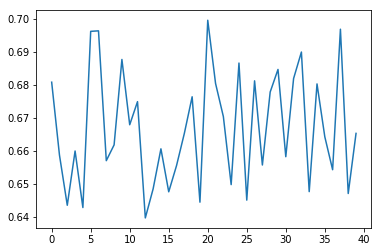

In [47]:
plt.plot(mean_cv)


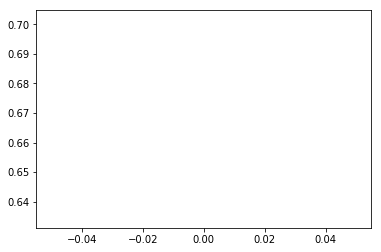

In [48]:
plt.plot(knn.score(X_test, y_test))

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm = SVC()
mean_cv1 = []


for iteration_1 in range(1,41):
    print(iteration_1)
    
    result_train_negative_x1 = result_train_negative[result_train_negative['train_index'] == iteration_1]
    frames1 = [result_train_positive, result_train_negative_x1.drop(['train_index'], axis = 1)]
    df935_train1 = pd.concat(frames1)
    
    y_train1 = df935_train1['class'].values
    X_train1 = df935_train1.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
    
    svm.fit(X_train1,y_train1)
    cv_scores1 = cross_val_score(svm, X_train1, y_train1, cv=5)
    mean_cv1.append(np.mean(cv_scores1))
    
    y_pred1 = svm.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred1))
    print(classification_report(y_test, y_pred1))
    print(cv_scores1)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores1)))

1


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1770  259]
 [  69    4]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      2029
           1       0.02      0.05      0.02        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.84      0.88      2102

[0.71276596 0.72340426 0.67741935 0.74193548 0.66666667]
Average 5-Fold CV Score: 0.7044383436284603
2


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1674  355]
 [  68    5]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2029
           1       0.01      0.07      0.02        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.45      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.70967742 0.74193548 0.69565217 0.68131868 0.68131868]
Average 5-Fold CV Score: 0.7019804879552426
3


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1661  368]
 [  65    8]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2029
           1       0.02      0.11      0.04        73

   micro avg       0.79      0.79      0.79      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.79      0.86      2102

[0.65217391 0.81521739 0.63736264 0.68888889 0.67777778]
Average 5-Fold CV Score: 0.6942841216754261
4


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1573  456]
 [  61   12]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2029
           1       0.03      0.16      0.04        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.49      0.47      0.45      2102
weighted avg       0.93      0.75      0.83      2102

[0.64444444 0.8        0.68181818 0.625      0.80681818]
Average 5-Fold CV Score: 0.7116161616161616
5


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1769  260]
 [  70    3]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2029
           1       0.01      0.04      0.02        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.84      0.88      2102

[0.72043011 0.76344086 0.73626374 0.68131868 0.71428571]
Average 5-Fold CV Score: 0.7231478199220135
6


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1663  366]
 [  65    8]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2029
           1       0.02      0.11      0.04        73

   micro avg       0.79      0.79      0.79      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.79      0.86      2102

[0.74157303 0.79775281 0.75       0.68181818 0.67816092]
Average 5-Fold CV Score: 0.7298609888110081
7


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1717  312]
 [  68    5]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2029
           1       0.02      0.07      0.03        73

   micro avg       0.82      0.82      0.82      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.82      0.87      2102

[0.73958333 0.69791667 0.78723404 0.64893617 0.74468085]
Average 5-Fold CV Score: 0.7236702127659574
8


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1673  356]
 [  66    7]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2029
           1       0.02      0.10      0.03        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.69230769 0.71428571 0.7        0.65555556 0.71111111]
Average 5-Fold CV Score: 0.6946520146520145
9


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1792  237]
 [  69    4]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2029
           1       0.02      0.05      0.03        73

   micro avg       0.85      0.85      0.85      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.85      0.89      2102

[0.69072165 0.74226804 0.65625    0.66666667 0.70833333]
Average 5-Fold CV Score: 0.69284793814433
10


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1526  503]
 [  61   12]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      2029
           1       0.02      0.16      0.04        73

   micro avg       0.73      0.73      0.73      2102
   macro avg       0.49      0.46      0.44      2102
weighted avg       0.93      0.73      0.82      2102

[0.6091954  0.77011494 0.76470588 0.70588235 0.71764706]
Average 5-Fold CV Score: 0.7135091277890467
11


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1792  237]
 [  70    3]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2029
           1       0.01      0.04      0.02        73

   micro avg       0.85      0.85      0.85      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.85      0.89      2102

[0.71134021 0.71134021 0.73958333 0.6875     0.79166667]
Average 5-Fold CV Score: 0.7282860824742268
12


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1770  259]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      2029
           1       0.02      0.08      0.04        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.48      0.48      2102
weighted avg       0.93      0.84      0.89      2102

[0.6875     0.77083333 0.69473684 0.70526316 0.70526316]
Average 5-Fold CV Score: 0.7127192982456141
13


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1643  386]
 [  66    7]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2029
           1       0.02      0.10      0.03        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.49      0.45      0.45      2102
weighted avg       0.93      0.78      0.85      2102

[0.73333333 0.77777778 0.6741573  0.69662921 0.68539326]
Average 5-Fold CV Score: 0.713458177278402
14


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1685  344]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2029
           1       0.02      0.08      0.03        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.71910112 0.76404494 0.71590909 0.71590909 0.73563218]
Average 5-Fold CV Score: 0.7301192866283917
15


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1751  278]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2029
           1       0.02      0.08      0.03        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.84      0.88      2102

[0.71428571 0.75555556 0.73033708 0.70786517 0.65168539]
Average 5-Fold CV Score: 0.7119457820581416
16


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1607  422]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2029
           1       0.02      0.12      0.04        73

   micro avg       0.77      0.77      0.77      2102
   macro avg       0.49      0.46      0.45      2102
weighted avg       0.93      0.77      0.84      2102

[0.69767442 0.74418605 0.62352941 0.62352941 0.69047619]
Average 5-Fold CV Score: 0.6758790958243763
17


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1737  292]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2029
           1       0.02      0.08      0.03        73

   micro avg       0.83      0.83      0.83      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.83      0.88      2102

[0.76595745 0.72340426 0.77419355 0.73913043 0.68478261]
Average 5-Fold CV Score: 0.7374936587986035
18


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1821  208]
 [  70    3]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2029
           1       0.01      0.04      0.02        73

   micro avg       0.87      0.87      0.87      2102
   macro avg       0.49      0.47      0.48      2102
weighted avg       0.93      0.87      0.90      2102

[0.73       0.76767677 0.71428571 0.71428571 0.7244898 ]
Average 5-Fold CV Score: 0.7301475984333128
19


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1665  364]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2029
           1       0.02      0.12      0.04        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.47      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.73033708 0.71910112 0.77272727 0.68181818 0.67045455]
Average 5-Fold CV Score: 0.7148876404494382
20


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1698  331]
 [  68    5]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2029
           1       0.01      0.07      0.02        73

   micro avg       0.81      0.81      0.81      2102
   macro avg       0.49      0.45      0.46      2102
weighted avg       0.93      0.81      0.86      2102

[0.67021277 0.75531915 0.77419355 0.65591398 0.77419355]
Average 5-Fold CV Score: 0.7259665980324869
21


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1673  356]
 [  66    7]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2029
           1       0.02      0.10      0.03        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.77173913 0.73626374 0.76666667 0.71111111 0.78888889]
Average 5-Fold CV Score: 0.7549339066730372
22


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1804  225]
 [  71    2]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2029
           1       0.01      0.03      0.01        73

   micro avg       0.86      0.86      0.86      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.86      0.89      2102

[0.7244898  0.69387755 0.71134021 0.65625    0.76041667]
Average 5-Fold CV Score: 0.7092748439582018
23


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1697  332]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2029
           1       0.03      0.12      0.04        73

   micro avg       0.81      0.81      0.81      2102
   macro avg       0.50      0.48      0.47      2102
weighted avg       0.93      0.81      0.87      2102

[0.71428571 0.74725275 0.69662921 0.68539326 0.76404494]
Average 5-Fold CV Score: 0.7215211754537598
24


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1566  463]
 [  63   10]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2029
           1       0.02      0.14      0.04        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.49      0.45      0.45      2102
weighted avg       0.93      0.75      0.83      2102

[0.71590909 0.78409091 0.75862069 0.74712644 0.66666667]
Average 5-Fold CV Score: 0.7344827586206897
25


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1682  347]
 [  68    5]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2029
           1       0.01      0.07      0.02        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.45      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.73913043 0.74725275 0.7        0.73333333 0.76666667]
Average 5-Fold CV Score: 0.7372766364070712
26


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1768  261]
 [  68    5]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2029
           1       0.02      0.07      0.03        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.84      0.88      2102

[0.7311828  0.69892473 0.66304348 0.68478261 0.7173913 ]
Average 5-Fold CV Score: 0.6990649836372137
27


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1688  341]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2029
           1       0.02      0.08      0.03        73

   micro avg       0.81      0.81      0.81      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.81      0.86      2102

[0.68478261 0.73913043 0.71428571 0.72222222 0.72222222]
Average 5-Fold CV Score: 0.716528640441684
28


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1469  560]
 [  60   13]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83      2029
           1       0.02      0.18      0.04        73

   micro avg       0.71      0.71      0.71      2102
   macro avg       0.49      0.45      0.43      2102
weighted avg       0.93      0.71      0.80      2102

[0.74418605 0.75581395 0.72941176 0.78823529 0.65882353]
Average 5-Fold CV Score: 0.7352941176470588
29


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1745  284]
 [  69    4]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2029
           1       0.01      0.05      0.02        73

   micro avg       0.83      0.83      0.83      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.83      0.88      2102

[0.74226804 0.76041667 0.77894737 0.74736842 0.73684211]
Average 5-Fold CV Score: 0.7531685205281244
30


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1700  329]
 [  66    7]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2029
           1       0.02      0.10      0.03        73

   micro avg       0.81      0.81      0.81      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.81      0.87      2102

[0.73033708 0.79775281 0.70454545 0.67045455 0.68965517]
Average 5-Fold CV Score: 0.7185490120108484
31


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1679  350]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2029
           1       0.02      0.08      0.03        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.45      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.64835165 0.76923077 0.75555556 0.7        0.69662921]
Average 5-Fold CV Score: 0.7139534373242239
32


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1789  240]
 [  69    4]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2029
           1       0.02      0.05      0.03        73

   micro avg       0.85      0.85      0.85      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.85      0.89      2102

[0.67708333 0.77083333 0.67368421 0.65957447 0.68085106]
Average 5-Fold CV Score: 0.6924052818215752
33


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1462  567]
 [  57   16]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      2029
           1       0.03      0.22      0.05        73

   micro avg       0.70      0.70      0.70      2102
   macro avg       0.49      0.47      0.44      2102
weighted avg       0.93      0.70      0.80      2102

[0.70588235 0.76470588 0.70238095 0.78313253 0.62650602]
Average 5-Fold CV Score: 0.7165215483783876
34


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1703  326]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2029
           1       0.02      0.08      0.03        73

   micro avg       0.81      0.81      0.81      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.81      0.87      2102

[0.69662921 0.73033708 0.72727273 0.7816092  0.70114943]
Average 5-Fold CV Score: 0.7273995280194427
35


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1619  410]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2029
           1       0.02      0.12      0.04        73

   micro avg       0.77      0.77      0.77      2102
   macro avg       0.49      0.46      0.45      2102
weighted avg       0.93      0.77      0.84      2102

[0.67816092 0.77011494 0.69767442 0.73255814 0.70930233]
Average 5-Fold CV Score: 0.7175621491579791
36


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1324  705]
 [  51   22]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.78      2029
           1       0.03      0.30      0.06        73

   micro avg       0.64      0.64      0.64      2102
   macro avg       0.50      0.48      0.42      2102
weighted avg       0.93      0.64      0.75      2102

[0.71084337 0.75609756 0.7037037  0.65432099 0.72839506]
Average 5-Fold CV Score: 0.7106721375112012
37


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1754  275]
 [  69    4]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2029
           1       0.01      0.05      0.02        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.84      0.88      2102

[0.71578947 0.75789474 0.67741935 0.69892473 0.7311828 ]
Average 5-Fold CV Score: 0.7162422184493492
38


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1640  389]
 [  65    8]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2029
           1       0.02      0.11      0.03        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.78      0.85      2102

[0.72527473 0.79120879 0.69662921 0.76404494 0.70786517]
Average 5-Fold CV Score: 0.7370045684652426
39


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1759  270]
 [  69    4]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2029
           1       0.01      0.05      0.02        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.84      0.88      2102

[0.74193548 0.75268817 0.69230769 0.65934066 0.72527473]
Average 5-Fold CV Score: 0.7143093465674111
40


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/

[[1683  346]
 [  68    5]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2029
           1       0.01      0.07      0.02        73

   micro avg       0.80      0.80      0.80      2102
   macro avg       0.49      0.45      0.46      2102
weighted avg       0.93      0.80      0.86      2102

[0.72826087 0.80434783 0.72527473 0.73626374 0.75824176]
Average 5-Fold CV Score: 0.7504777830864787


In [50]:
svm.fit(X_train1,y_train1)

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
#from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
svm = SVC(class_weight="balanced", gamma="scale")
mean_cv1 = []


for iteration_1 in range(1,41):
    print('')
    print(iteration_1)
    
    result_train_negative_x1 = result_train_negative[result_train_negative['train_index'] == iteration_1]
    frames1 = [result_train_positive, result_train_negative_x1.drop(['train_index'], axis = 1)]
    df935_train1 = pd.concat(frames1)
    
    y_train1 = df935_train1['class'].values
    X_train1 = df935_train1.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
    
    svm.fit(X_train1,y_train1)
    cv = StratifiedKFold(n_splits=5, random_state=0)
    cv_scores1 = cross_val_score(svm, X_train1, y_train1, cv=cv, scoring="balanced_accuracy")
    mean_cv1.append(np.mean(cv_scores1))
    
    y_pred1 = svm.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred1))
    print(classification_report(y_test, y_pred1))
    print(cv_scores1)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores1)))


1
[[1657  372]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2029
           1       0.02      0.12      0.04        73

   micro avg       0.79      0.79      0.79      2102
   macro avg       0.49      0.47      0.46      2102
weighted avg       0.93      0.79      0.85      2102

[0.71090909 0.81636364 0.69697674 0.75046512 0.6972093 ]
Average 5-Fold CV Score: 0.734384778012685

2
[[1634  395]
 [  66    7]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2029
           1       0.02      0.10      0.03        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.49      0.45      0.45      2102
weighted avg       0.93      0.78      0.85      2102

[0.68668831 0.78316327 0.70289511 0.69500969 0.65891473]
Average 5-Fold CV Score: 0.7053342214264141

3
[[1603  426]
 [  62   11]]
              precision    recall  f1-score   support



[[1642  387]
 [  65    8]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2029
           1       0.02      0.11      0.03        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.78      0.85      2102

[0.7520202  0.76464646 0.74031008 0.70542636 0.69328165]
Average 5-Fold CV Score: 0.7311369509043928

20
[[1540  489]
 [  58   15]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2029
           1       0.03      0.21      0.05        73

   micro avg       0.74      0.74      0.74      2102
   macro avg       0.50      0.48      0.45      2102
weighted avg       0.93      0.74      0.82      2102

[0.72363636 0.73636364 0.73534884 0.67372093 0.77883721]
Average 5-Fold CV Score: 0.7295813953488373

21
[[1594  435]
 [  62   11]]
              precision    recall  f1-score   support



[[1627  402]
 [  66    7]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2029
           1       0.02      0.10      0.03        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.49      0.45      0.45      2102
weighted avg       0.93      0.78      0.84      2102

[0.74442959 0.77540107 0.67534884 0.72534884 0.7272093 ]
Average 5-Fold CV Score: 0.7295475272561456

38
[[1623  406]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2029
           1       0.02      0.12      0.04        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.49      0.46      0.46      2102
weighted avg       0.93      0.78      0.84      2102

[0.74588975 0.78989362 0.69817998 0.75101112 0.69742164]
Average 5-Fold CV Score: 0.7364792211424313

39
[[1692  337]
 [  65    8]]
              precision    recall  f1-score   support



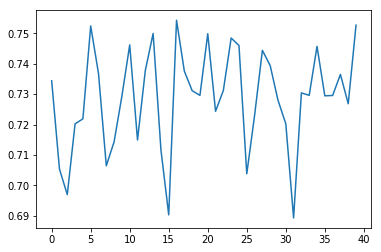

In [52]:
plt.plot(mean_cv1)

In [53]:
y_pred1 = svm.predict(X_train1)
print(confusion_matrix(y_train1, y_pred1))
print(classification_report(y_train1, y_pred1))

[[204  36]
 [ 39 178]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       240
           1       0.83      0.82      0.83       217

   micro avg       0.84      0.84      0.84       457
   macro avg       0.84      0.84      0.84       457
weighted avg       0.84      0.84      0.84       457



In [54]:
y_test1 = result1['class'].values
X_test1 = result1.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
print(svm.score(X_test1, y_test1))

0.7678401522359658


In [55]:
y_pred1 = svm.predict(X_test1)
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[1604  425]
 [  63   10]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2029
           1       0.02      0.14      0.04        73

   micro avg       0.77      0.77      0.77      2102
   macro avg       0.49      0.46      0.45      2102
weighted avg       0.93      0.77      0.84      2102



In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
mean_cv2 = []


for iteration_2 in range(1,41) :
    result_train_negative_x2 = result_train_negative[result_train_negative['train_index'] == iteration_2]
    frames2 = [result_train_positive, result_train_negative_x2.drop(['train_index'], axis = 1)]
    df935_train2 = pd.concat(frames2)
    y_train2 = df935_train2['class'].values
    X_train2 = df935_train2.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
    lr.fit(X_train2,y_train2)
    
    cv_scores2 = cross_val_score(lr, X_train2, y_train2, cv=5)
    mean_cv2.append(np.mean(cv_scores2))
    
    y_pred2 = lr.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred2))
    print(classification_report(y_test, y_pred2))
    print(cv_scores2)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores2)))

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1585  444]
 [  60   13]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2029
           1       0.03      0.18      0.05        73

   micro avg       0.76      0.76      0.76      2102
   macro avg       0.50      0.48      0.46      2102
weighted avg       0.93      0.76      0.83      2102

[0.72340426 0.73404255 0.70967742 0.72043011 0.67741935]
Average 5-Fold CV Score: 0.7129947380462137
[[1602  427]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2029
           1       0.02      0.12      0.04        73

   micro avg       0.77      0.77      0.77      2102
   macro avg       0.49      0.46      0.45      2102
weighted avg       0.93      0.77      0.84      2102

[0.67741935 0.68817204 0.72826087 0.63736264 0.64835165]
Average 5-Fold CV Score: 0.6759133106257931
[[1545  484]
 [  59   14]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1499  530]
 [  57   16]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      2029
           1       0.03      0.22      0.05        73

   micro avg       0.72      0.72      0.72      2102
   macro avg       0.50      0.48      0.44      2102
weighted avg       0.93      0.72      0.81      2102

[0.64444444 0.77777778 0.70454545 0.64772727 0.69318182]
Average 5-Fold CV Score: 0.6935353535353534
[[1576  453]
 [  63   10]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2029
           1       0.02      0.14      0.04        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.49      0.46      0.45      2102
weighted avg       0.93      0.75      0.83      2102

[0.74193548 0.77419355 0.64835165 0.69230769 0.68131868]
Average 5-Fold CV Score: 0.7076214108472174
[[1519  510]
 [  61   12]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1593  436]
 [  58   15]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2029
           1       0.03      0.21      0.06        73

   micro avg       0.76      0.76      0.76      2102
   macro avg       0.50      0.50      0.46      2102
weighted avg       0.93      0.76      0.84      2102

[0.65625    0.6875     0.70212766 0.71276596 0.69148936]
Average 5-Fold CV Score: 0.6900265957446808
[[1550  479]
 [  58   15]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2029
           1       0.03      0.21      0.05        73

   micro avg       0.74      0.74      0.74      2102
   macro avg       0.50      0.48      0.45      2102
weighted avg       0.93      0.74      0.82      2102

[0.72527473 0.78021978 0.75555556 0.7        0.67777778]
Average 5-Fold CV Score: 0.7277655677655679
[[1598  431]
 [  61   12]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1543  486]
 [  57   16]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2029
           1       0.03      0.22      0.06        73

   micro avg       0.74      0.74      0.74      2102
   macro avg       0.50      0.49      0.45      2102
weighted avg       0.93      0.74      0.82      2102

[0.67816092 0.77011494 0.70588235 0.69411765 0.64705882]
Average 5-Fold CV Score: 0.6990669371196755
[[1658  371]
 [  63   10]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2029
           1       0.03      0.14      0.04        73

   micro avg       0.79      0.79      0.79      2102
   macro avg       0.49      0.48      0.46      2102
weighted avg       0.93      0.79      0.86      2102

[0.68041237 0.70103093 0.72916667 0.63541667 0.6875    ]
Average 5-Fold CV Score: 0.686705326460481
[[1675  354]
 [  63   10]]
              precision    recall  f1-score   support

         

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1562  467]
 [  59   14]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2029
           1       0.03      0.19      0.05        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.50      0.48      0.45      2102
weighted avg       0.93      0.75      0.83      2102

[0.66666667 0.75555556 0.66292135 0.74157303 0.60674157]
Average 5-Fold CV Score: 0.6866916354556805
[[1568  461]
 [  57   16]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2029
           1       0.03      0.22      0.06        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.50      0.50      0.46      2102
weighted avg       0.93      0.75      0.83      2102

[0.66292135 0.76404494 0.69318182 0.76136364 0.70114943]
Average 5-Fold CV Score: 0.7165322343935284
[[1525  504]
 [  54   19]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1550  479]
 [  61   12]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2029
           1       0.02      0.16      0.04        73

   micro avg       0.74      0.74      0.74      2102
   macro avg       0.49      0.46      0.45      2102
weighted avg       0.93      0.74      0.82      2102

[0.73255814 0.76744186 0.67058824 0.67058824 0.64285714]
Average 5-Fold CV Score: 0.6968067226890755
[[1607  422]
 [  59   14]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2029
           1       0.03      0.19      0.06        73

   micro avg       0.77      0.77      0.77      2102
   macro avg       0.50      0.49      0.46      2102
weighted avg       0.93      0.77      0.84      2102

[0.76595745 0.71276596 0.75268817 0.69565217 0.70652174]
Average 5-Fold CV Score: 0.7267170978683616
[[1649  380]
 [  61   12]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1574  455]
 [  60   13]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2029
           1       0.03      0.18      0.05        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.50      0.48      0.45      2102
weighted avg       0.93      0.75      0.83      2102

[0.68539326 0.70786517 0.68181818 0.61363636 0.61363636]
Average 5-Fold CV Score: 0.6604698672114402
[[1549  480]
 [  59   14]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2029
           1       0.03      0.19      0.05        73

   micro avg       0.74      0.74      0.74      2102
   macro avg       0.50      0.48      0.45      2102
weighted avg       0.93      0.74      0.82      2102

[0.72340426 0.70212766 0.76344086 0.66666667 0.67741935]
Average 5-Fold CV Score: 0.7066117593228094


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1573  456]
 [  59   14]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2029
           1       0.03      0.19      0.05        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.50      0.48      0.46      2102
weighted avg       0.93      0.75      0.83      2102

[0.69565217 0.79120879 0.74444444 0.71111111 0.7       ]
Average 5-Fold CV Score: 0.728483304135478
[[1716  313]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2029
           1       0.02      0.08      0.03        73

   micro avg       0.82      0.82      0.82      2102
   macro avg       0.49      0.46      0.47      2102
weighted avg       0.93      0.82      0.87      2102

[0.6122449  0.71428571 0.72164948 0.66666667 0.76041667]
Average 5-Fold CV Score: 0.6950526860228627
[[1530  499]
 [  60   13]]
              precision    recall  f1-score   support

         

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1556  473]
 [  60   13]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2029
           1       0.03      0.18      0.05        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.49      0.47      0.45      2102
weighted avg       0.93      0.75      0.83      2102

[0.67045455 0.70454545 0.70114943 0.66666667 0.63218391]
Average 5-Fold CV Score: 0.675
[[1576  453]
 [  59   14]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2029
           1       0.03      0.19      0.05        73

   micro avg       0.76      0.76      0.76      2102
   macro avg       0.50      0.48      0.46      2102
weighted avg       0.93      0.76      0.83      2102

[0.67391304 0.79120879 0.67777778 0.73333333 0.75555556]
Average 5-Fold CV Score: 0.7263577002707438
[[1621  408]
 [  61   12]]
              precision    recall  f1-score   support

           0       0.

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1640  389]
 [  61   12]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2029
           1       0.03      0.16      0.05        73

   micro avg       0.79      0.79      0.79      2102
   macro avg       0.50      0.49      0.46      2102
weighted avg       0.93      0.79      0.85      2102

[0.70652174 0.75       0.67032967 0.68888889 0.62222222]
Average 5-Fold CV Score: 0.6875925041142433
[[1516  513]
 [  56   17]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      2029
           1       0.03      0.23      0.06        73

   micro avg       0.73      0.73      0.73      2102
   macro avg       0.50      0.49      0.45      2102
weighted avg       0.93      0.73      0.81      2102

[0.6744186  0.74418605 0.70588235 0.72941176 0.6       ]
Average 5-Fold CV Score: 0.69077975376197
[[1608  421]
 [  66    7]]
              precision    recall  f1-score   support

          

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1542  487]
 [  57   16]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2029
           1       0.03      0.22      0.06        73

   micro avg       0.74      0.74      0.74      2102
   macro avg       0.50      0.49      0.45      2102
weighted avg       0.93      0.74      0.82      2102

[0.69662921 0.7752809  0.68181818 0.63636364 0.68965517]
Average 5-Fold CV Score: 0.6959494205910324
[[1527  502]
 [  55   18]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      2029
           1       0.03      0.25      0.06        73

   micro avg       0.74      0.74      0.74      2102
   macro avg       0.50      0.50      0.45      2102
weighted avg       0.93      0.74      0.82      2102

[0.6043956  0.68131868 0.72222222 0.71111111 0.62921348]
Average 5-Fold CV Score: 0.6696522204387373
[[1735  294]
 [  68    5]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1493  536]
 [  56   17]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      2029
           1       0.03      0.23      0.05        73

   micro avg       0.72      0.72      0.72      2102
   macro avg       0.50      0.48      0.44      2102
weighted avg       0.93      0.72      0.81      2102

[0.75294118 0.75294118 0.66666667 0.73493976 0.61445783]
Average 5-Fold CV Score: 0.7043893219938577
[[1621  408]
 [  60   13]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2029
           1       0.03      0.18      0.05        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.50      0.49      0.46      2102
weighted avg       0.93      0.78      0.85      2102

[0.70786517 0.69662921 0.68181818 0.75862069 0.64367816]
Average 5-Fold CV Score: 0.6977222828830734
[[1473  556]
 [  60   13]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1397  632]
 [  57   16]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      2029
           1       0.02      0.22      0.04        73

   micro avg       0.67      0.67      0.67      2102
   macro avg       0.49      0.45      0.42      2102
weighted avg       0.93      0.67      0.78      2102

[0.73493976 0.70731707 0.65432099 0.64197531 0.66666667]
Average 5-Fold CV Score: 0.6810439590339679
[[1569  460]
 [  60   13]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2029
           1       0.03      0.18      0.05        73

   micro avg       0.75      0.75      0.75      2102
   macro avg       0.50      0.48      0.45      2102
weighted avg       0.93      0.75      0.83      2102

[0.74736842 0.70526316 0.69892473 0.6344086  0.70967742]
Average 5-Fold CV Score: 0.6991284663271081
[[1597  432]
 [  61   12]]
              precision    recall  f1-score   support

        

/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

[[1621  408]
 [  62   11]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2029
           1       0.03      0.15      0.04        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.49      0.47      0.46      2102
weighted avg       0.93      0.78      0.84      2102

[0.72043011 0.65591398 0.72527473 0.64835165 0.7032967 ]
Average 5-Fold CV Score: 0.6906534325889165
[[1514  515]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      2029
           1       0.02      0.12      0.03        73

   micro avg       0.72      0.72      0.72      2102
   macro avg       0.49      0.43      0.43      2102
weighted avg       0.93      0.72      0.81      2102

[0.69565217 0.7173913  0.73626374 0.74725275 0.71428571]
Average 5-Fold CV Score: 0.7221691352126135


/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ansuman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
y_test2 = result1['class'].values
X_test2 = result1.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
print(lr.score(X_test2, y_test2))

0.7245480494766888


In [58]:
y_pred1 = svm.predict(X_test1)
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[1604  425]
 [  63   10]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2029
           1       0.02      0.14      0.04        73

   micro avg       0.77      0.77      0.77      2102
   macro avg       0.49      0.46      0.45      2102
weighted avg       0.93      0.77      0.84      2102



In [59]:
#from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
clf=RandomForestClassifier(n_estimators=100)
mean_cv3 = []
pred_result = pd.DataFrame()
pred_result['y_test'] = y_test

for iteration_3 in range(1,41):
    print('')
    print(iteration_3)
    
    result_train_negative_x3 = result_train_negative[result_train_negative['train_index'] == iteration_3]
    frames3 = [result_train_positive, result_train_negative_x3.drop(['train_index'], axis = 1)]
    df935_train3 = pd.concat(frames3)
    
    y_train3 = df935_train3['class'].values
    X_train3 = df935_train3.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
    
    clf.fit(X_train3,y_train3)
    cv3 = StratifiedKFold(n_splits=5, random_state=0)
    cv_scores3 = cross_val_score(clf, X_train3, y_train3, cv=cv3, scoring="balanced_accuracy")
    mean_cv3.append(np.mean(cv_scores3))
    
    y_pred3 = clf.predict(X_test)
    pred_result = pd.concat([pred_result,pd.DataFrame(y_pred3)], axis = 1)
    
    print(confusion_matrix(y_test, y_pred3))
    print(classification_report(y_test, y_pred3))
    print(cv_scores3)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores3)))


1
[[1770  259]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      2029
           1       0.02      0.08      0.04        73

   micro avg       0.84      0.84      0.84      2102
   macro avg       0.49      0.48      0.48      2102
weighted avg       0.93      0.84      0.89      2102

[0.68545455 0.785      0.66697674 0.71395349 0.69232558]
Average 5-Fold CV Score: 0.7087420718816068

2
[[1716  313]
 [  69    4]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2029
           1       0.01      0.05      0.02        73

   micro avg       0.82      0.82      0.82      2102
   macro avg       0.49      0.45      0.46      2102
weighted avg       0.93      0.82      0.87      2102

[0.716141   0.72518553 0.70716659 0.61482558 0.6749031 ]
Average 5-Fold CV Score: 0.6876443600696092

3
[[1698  331]
 [  66    7]]
              precision    recall  f1-score   support


[[1689  340]
 [  64    9]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2029
           1       0.03      0.12      0.04        73

   micro avg       0.81      0.81      0.81      2102
   macro avg       0.49      0.48      0.47      2102
weighted avg       0.93      0.81      0.86      2102

[0.73005051 0.8209596  0.7630491  0.68268734 0.67906977]
Average 5-Fold CV Score: 0.7351632605120977

20
[[1744  285]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2029
           1       0.02      0.08      0.03        73

   micro avg       0.83      0.83      0.83      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.83      0.88      2102

[0.67954545 0.79636364 0.78372093 0.59232558 0.70906977]
Average 5-Fold CV Score: 0.7122050739957716

21
[[1666  363]
 [  66    7]]
              precision    recall  f1-score   support



[[1785  244]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2029
           1       0.02      0.08      0.04        73

   micro avg       0.85      0.85      0.85      2102
   macro avg       0.49      0.48      0.48      2102
weighted avg       0.93      0.85      0.89      2102

[0.69741533 0.79188948 0.70697674 0.6272093  0.61418605]
Average 5-Fold CV Score: 0.6875353811714962

38
[[1732  297]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2029
           1       0.02      0.08      0.03        73

   micro avg       0.83      0.83      0.83      2102
   macro avg       0.49      0.47      0.47      2102
weighted avg       0.93      0.83      0.87      2102

[0.72316248 0.82325919 0.72219414 0.71840243 0.65798787]
Average 5-Fold CV Score: 0.7290012184317629

39
[[1766  263]
 [  68    5]]
              precision    recall  f1-score   support



In [60]:
pred_result

,y_test,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
pred_result.to_csv('../9_35/pred_result_random_forest.csv')

#### 1. check the prediction from the ensemble #####

 get the prediction of the majority of classifiers in the ensemble
 if sum >=21,pred class = 1
 if sum<= 19, pred class = 0
 if sum = 20 , pred class= doubtful
 based obn comparison of y_test & pred_class, calculate precision, recall

### 2. do hyperparameter grid search  #####

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
https://scikit-learn.org/stable/modules/cross_validation.html
https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
google: finetune classifier scikitlearn towards datascience

In [64]:
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt

#from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


gamma_range = np.logspace(-4,2,7)
C_range = np.logspace(-3,3,7)
param_grid = dict(gamma=gamma_range, C=C_range)

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

clf= SVC()

In [72]:
from matplotlib.colors import Normalize

# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))



1
{'mean_fit_time': array([0.03684597, 0.03661437, 0.03629098, 0.0366179 , 0.0361022 ,
       0.03896646, 0.03568144, 0.03603959, 0.03622088, 0.03630919,
       0.03764696, 0.03891129, 0.03876204, 0.03508663, 0.03614278,
       0.03647676, 0.03647223, 0.0380352 , 0.03937521, 0.03900437,
       0.03546762, 0.03645973, 0.03654175, 0.03386602, 0.03893585,
       0.03962235, 0.03916068, 0.03554454, 0.03646655, 0.03285275,
       0.03026857, 0.03939738, 0.04072556, 0.04014206, 0.03670988,
       0.03283324, 0.0292491 , 0.04209208, 0.03986168, 0.040309  ,
       0.04020467, 0.03643804, 0.02940364, 0.04041982, 0.04228024,
       0.03948283, 0.04028497, 0.04012003, 0.03663325]), 'std_fit_time': array([9.15700546e-04, 4.23565550e-04, 2.50738126e-04, 1.98491599e-04,
       1.26914185e-04, 1.02057249e-03, 7.98330212e-04, 9.02717097e-05,
       4.68001390e-04, 1.88530365e-04, 3.19932981e-04, 7.14397551e-05,
       3.31334629e-04, 1.37062941e-04, 1.89031108e-04, 3.99416366e-04,
       2.82579815e-

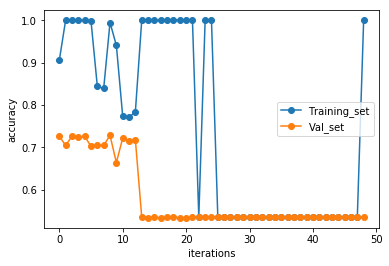

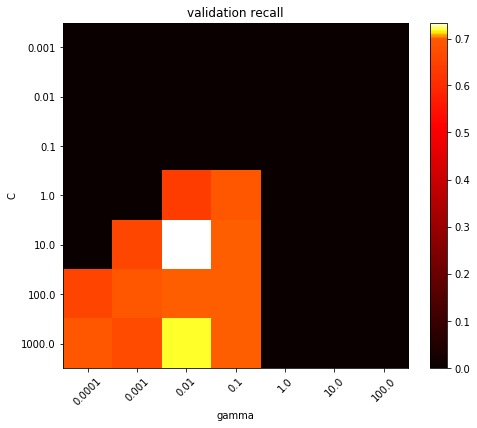

{'C': 10.0, 'gamma': 0.01}
   pred_0  pred_1
0    1631     398
1      61      12
              precision    recall  f1-score   support

           0       0.96      0.80      0.88      2029
           1       0.03      0.16      0.05        73

   micro avg       0.78      0.78      0.78      2102
   macro avg       0.50      0.48      0.46      2102
weighted avg       0.93      0.78      0.85      2102



In [75]:
#clf=RandomForestClassifier(n_estimators=100)
mean_cv3 = []
pred_result = pd.DataFrame()
pred_result['y_test'] = y_test

for iteration_3 in range(1,2): #41):
    print('')
    print(iteration_3)
    
    result_train_negative_x3 = result_train_negative[result_train_negative['train_index'] == iteration_3]
    frames3 = [result_train_positive, result_train_negative_x3.drop(['train_index'], axis = 1)]
    df935_train3 = pd.concat(frames3)
    
    y_train3 = df935_train3['class'].values
    X_train3 = df935_train3.drop(['id', 'class', 'uniprot_id', 'res'], axis = 1)
    
    #clf.fit(X_train3,y_train3)
    cv3 = StratifiedKFold(n_splits=5, random_state=0)
    #cv_scores3 = cross_val_score(clf, X_train3, y_train3, cv=cv3, scoring="balanced_accuracy")
    #mean_cv3.append(np.mean(cv_scores3))
    grid_search= GridSearchCV(clf, param_grid=param_grid, scoring=scorers, refit='recall_score',
                             cv=cv3, return_train_score=True)
    grid_search.fit(X_train3,y_train3)
    
    grid_results = pd.DataFrame(grid_search.cv_results_)
    grid_results = grid_results.sort_values(by='mean_test_recall_score', ascending=False).reset_index()
    grid_results = grid_results[['param_C','param_gamma', 'mean_train_recall_score','mean_test_recall_score',
                                'mean_train_accuracy_score','mean_test_accuracy_score',
                                'mean_train_precision_score','mean_test_precision_score']]
    print(grid_search.cv_results_)
    print("")
    print(grid_results)
    
    # variation with parameters
    fig,ax2 = plt.subplots(1, 1)
    #ax2.hold(True)
    ax2.plot(grid_results['mean_train_accuracy_score'],label='Training_set', marker='o')
    ax2.plot(grid_results['mean_test_accuracy_score'],label='Val_set', marker='o')
    ax2.set_ylabel("accuracy")
    ax2.set_xlabel("iterations")
    ax2.legend(fancybox=True)
    
    
    # heatmap
    scores = grid_search.cv_results_['mean_test_recall_score'].reshape(len(C_range),len(gamma_range))
    plt.figure(figsize=(8,6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.0, midpoint=0.7))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)),gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)),C_range)
    plt.title('validation recall')
    plt.show()
    
    
    
    y_pred3 = grid_search.predict(X_test.values)
    #pred_result = pd.concat([pred_result,pd.DataFrame(y_pred3)], axis = 1)
    print(grid_search.best_params_)
    
    #print(confusion_matrix(y_test, y_pred3))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred3),columns=['pred_0','pred_1'],index=['0','1']))
    print(classification_report(y_test, y_pred3))
    #print(cv_scores3)
    #print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores3)))

### 3. convert the feature sets into images , compare images of class 0 vs 1 - are they separable
 try MLP or DNN as classifier

## 4. framing the proteinstructure as images, properties as channels - bioinfo paper

## 5 survey literature 
 high dim data with class imbalance - what strategies work?
 refer to algos used in 20-19/2020 us paper on sugar specificity
  - which algos & window sizes & paramsettings were used